# K-nearest neighbors - Jutin Nguyen

In [13]:
from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


# Setting random seed.
seed = 123
np.random.seed(seed)

In [7]:
# Fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# Data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

C:\Users\justi\PycharmProjects\CS-171-HW1\.venv\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [8]:
# Cleaning the data

# Dropping columns with 30% missing values
X = X.drop(columns=['weight', 'payer_code', 'medical_specialty'])


In [9]:
# Using Label and Ordinal Encoding to make non-numerical data numerical
le = LabelEncoder()
columns_to_encode = ['race', 'gender', 'diag_1', 'diag_2', 'diag_3',
            'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
            'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
            'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
            'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
            'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
            'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

for col in columns_to_encode:
    X[col] = le.fit_transform(X[col])

# Create binary values for the 'readmitted' column using .loc
y.loc[:, 'readmitted'] = y['readmitted'].apply(lambda x: 0 if x == "NO" else 1)

oe = OrdinalEncoder(categories=[['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']])
X['age'] = oe.fit_transform(X[['age']])

# Extract y and ensure it's a one-dimensional array
y = y['readmitted'].values.ravel()

In [10]:
# Creating a 75% training and 25% testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

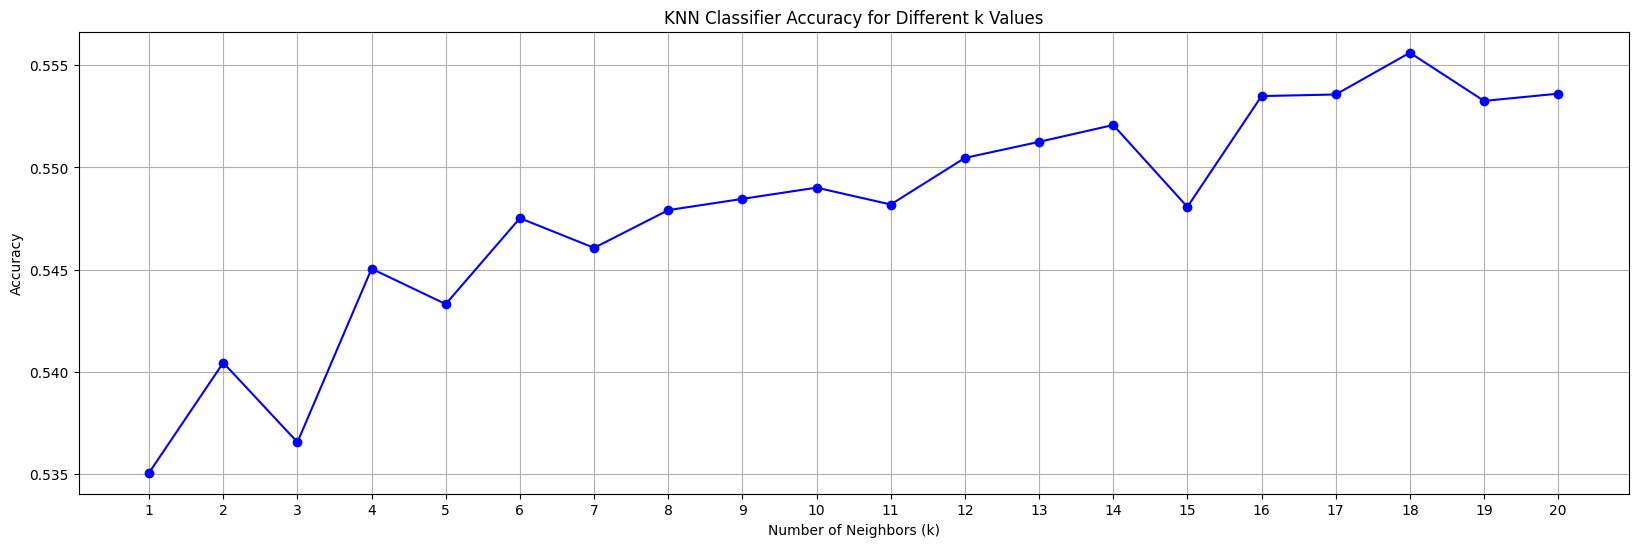

In [17]:
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(20, 6))
plt.plot(range(1, 21), accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Classifier Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()
